In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from datetime import datetime
import time
import seaborn as sns

In [9]:
def df_save (df):
    """
                        ---What it does---
    Saves your df of choice to a .csv file in the same directory of the parent file. The file name is up to you, though the function appends '_ready' for easy finding.

                        ---What it needs---
    * Your input for the name (be careful with adding spaces)
    * Your ready-to-save df

                        ---What it returns---
    A .csv file
    """
    name = input("Type the name of your df> ")
    name = name + "_ready.csv"
    df.to_csv(name, sep = ',')

def null_count (df):
    """
                        ---What it does---
    Identifies and counts the number of null values in any given df. Does not return anything.

                        ---What it needs---
    A DataFrame
    """
    null_in_df = df.isnull().any()
    is_null = df.isnull().sum()
    print (f'Presence of null in clolumns:\n{null_in_df}\n\nNumber of null in columns:\n{is_null}')

convert = lambda e: datetime.utcfromtimestamp(e).strftime('%Y-%m-%d') # %H:%M:%S ommited

print("Done")

Done


In [10]:
df = pd.read_csv(r'..\data\the-movies-dataset\ratings_small.csv')
df2 = pd.read_csv(r'..\data\the-movies-dataset\ratings.csv')

# DF Ratings_small

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
userId       100004 non-null int64
movieId      100004 non-null int64
rating       100004 non-null float64
timestamp    100004 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [12]:
null_count(df)

Presence of null in clolumns:
userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

Number of null in columns:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [13]:
df.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


In [14]:
df.timestamp = df.timestamp.apply(convert)

In [15]:
df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,2009-12-14
1,1,1029,3.0,2009-12-14
2,1,1061,3.0,2009-12-14
3,1,1129,2.0,2009-12-14
4,1,1172,4.0,2009-12-14


In [16]:
df.columns = ['user_Id', 'movie_Id', 'rating', 'date']
df.head()

,user_Id,movie_Id,rating,date
0,1,31,2.5,2009-12-14
1,1,1029,3.0,2009-12-14
2,1,1061,3.0,2009-12-14
3,1,1129,2.0,2009-12-14
4,1,1172,4.0,2009-12-14


In [17]:
df = df.set_index('date')
df.head(1)

,user_Id,movie_Id,rating
date,,,
2009-12-14,1,31,2.5


In [18]:
df.describe()

,user_Id,movie_Id,rating
count,100004.000000,100004.000000,100004.000000
mean,347.011310,12548.664363,3.543608
std,195.163838,26369.198969,1.058064
min,1.000000,1.000000,0.500000
25%,182.000000,1028.000000,3.000000
50%,367.000000,2406.500000,4.000000
75%,520.000000,5418.000000,4.000000
max,671.000000,163949.000000,5.000000


# DF2 Ratings

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
userId       int64
movieId      int64
rating       float64
timestamp    int64
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [20]:
null_count(df2)

Presence of null in clolumns:
userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

Number of null in columns:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [21]:
df2.columns = ['user_Id', 'movie_Id', 'rating', 'date']
df2.head()

,user_Id,movie_Id,rating,date
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [22]:
df2.date = df2.date.apply(convert)

In [23]:
df2= df2.set_index('date')

In [24]:
df2.describe()

,user_Id,movie_Id,rating
count,2.602429e+07,2.602429e+07,2.602429e+07
mean,1.350371e+05,1.584911e+04,3.528090e+00
std,7.817620e+04,3.108526e+04,1.065443e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,6.716400e+04,1.073000e+03,3.000000e+00
50%,1.351630e+05,2.583000e+03,3.500000e+00
75%,2.026930e+05,6.503000e+03,4.000000e+00
max,2.708960e+05,1.762750e+05,5.000000e+00


In [25]:
df2.head(1)

,user_Id,movie_Id,rating
date,,,
2015-03-09,1,110,1.0


# Graphic displays

In [26]:
# Average movie rating
vc = df.rating.value_counts()
vc

4.0    28750
3.0    20064
5.0    15095
3.5    10538
4.5     7723
2.0     7271
2.5     4449
1.0     3326
1.5     1687
0.5     1101
Name: rating, dtype: int64

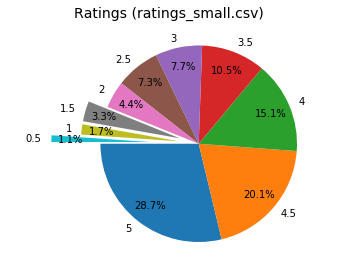

In [27]:
# Labels
labels = '5', '4.5', '4', '3.5', '3', '2.5', '2', '1.5', '1', '0.5'
explode = (0, 0, 0, 0, 0, 0, 0, 0.2, 0.2, 0.5)  

# Plot
plt.pie(vc, explode = explode, labels = labels, autopct = '%1.1f%%', startangle = 180, pctdistance = 0.8, labeldistance = 1.1)

plt.suptitle('Ratings (ratings_small.csv)', fontsize = 14)
plt.axis('equal')
plt.show()

In [28]:
vc = vc = df2.rating.value_counts()
vc

4.0    6998802
3.0    5256722
5.0    3812499
3.5    3116213
4.5    2170441
2.0    1762440
2.5    1255358
1.0     843310
0.5     404897
1.5     403607
Name: rating, dtype: int64

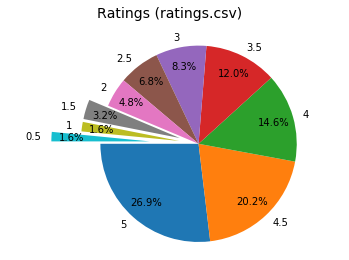

In [29]:
# Labels
labels = '5', '4.5', '4', '3.5', '3', '2.5', '2', '1.5', '1', '0.5'
explode = (0, 0, 0, 0, 0, 0, 0, 0.2, 0.2, 0.5)  

# Plot
plt.pie(vc, explode = explode, labels = labels, autopct = '%1.1f%%', startangle = 180, pctdistance = 0.8, labeldistance = 1.1)

plt.suptitle('Ratings (ratings.csv)', fontsize = 14)
plt.axis('equal')
plt.show()

# DF storing
The dfs saved under "ratings" (df2) and "ratings_small" (df) designation.

In [30]:
# df_save(df)
# df_save(df2)